#### E-commerce Sales Analysis and Customer Segmentation (RFM)

##This project analyzes one year of real e-commerce transaction data to uncover customer behavior, sales trends, and key business insights.  
##We also perform **RFM (Recency, Frequency, Monetary)** analysis to segment customers based on purchasing behavior.

##**Tools Used:** Python, Pandas, Matplotlib, Seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## data = pd.read_csv('data.csv')

In [2]:
data = pd.read_csv('data.csv', encoding='latin-1') 

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [48]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [49]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [12]:
data = data[data['CustomerID'].notnull()]

In [13]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [51]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [52]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Strip spaces and check names

In [53]:
data.columns = data.columns.str.strip()

## Total Revenue

In [54]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Total Revenue

In [55]:
data['Total'] = data['UnitPrice'] * data['Quantity']
Total_revenue = data['Total'].sum()

In [56]:
Total_revenue

9747747.933999998

## Monthly Sales Trend

In [57]:
data.set_index('InvoiceDate', inplace=True)
monthly_sales = data.resample('M')['UnitPrice'].sum()


C:\Users\Vinayak\AppData\Local\Temp\ipykernel_6332\397408045.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M')['UnitPrice'].sum()


In [58]:
monthly_sales 

InvoiceDate
2010-12-31    260520.850
2011-01-31    172752.800
2011-02-28    127448.770
2011-03-31    171486.510
2011-04-30    129164.961
2011-05-31    190685.460
2011-06-30    200717.340
2011-07-31    171906.791
2011-08-31    150385.680
2011-09-30    199235.212
2011-10-31    263434.090
2011-11-30    327149.850
2011-12-31    133915.660
Freq: ME, Name: UnitPrice, dtype: float64

## Revenue by Product

In [59]:
revenue_by_product = data.groupby('Description')['Total'].sum()

In [60]:
revenue_by_product

Description
 4 PURPLE FLOCK DINNER CANDLES     290.80
 50'S CHRISTMAS GIFT BAG LARGE    2341.13
 DOLLY GIRL BEAKER                2882.50
 I LOVE LONDON MINI BACKPACK      1628.17
 I LOVE LONDON MINI RUCKSACK         4.15
                                   ...   
wrongly marked carton 22804          0.00
wrongly marked. 23343 in box         0.00
wrongly sold (22719) barcode         0.00
wrongly sold as sets                 0.00
wrongly sold sets                    0.00
Name: Total, Length: 4223, dtype: float64

## Top Products

In [61]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

In [62]:
top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

## Count Number of Unique Transactions

In [63]:
num_transactions = data['InvoiceNo'].nunique()

In [64]:
num_transactions

25900

##  Group Data by Transaction

In [65]:
invoice_totals = data.groupby('InvoiceNo')['UnitPrice'].sum().sort_values(ascending=False)

In [66]:
invoice_totals

InvoiceNo
C556445    38970.00
C580605    17836.46
C540117    16888.02
C540118    16453.71
537632     13541.33
             ...   
560110         0.00
560111         0.00
561663         0.00
A563187   -11062.06
A563186   -11062.06
Name: UnitPrice, Length: 25900, dtype: float64

## Transaction Size (Number of Items per Invoice)

In [67]:
items_per_invoice = data.groupby('InvoiceNo')['Quantity'].sum()

In [68]:
items_per_invoice

InvoiceNo
536365        40
536366        12
536367        83
536368        15
536369         3
           ...  
C581484   -80995
C581490      -23
C581499       -1
C581568       -5
C581569       -6
Name: Quantity, Length: 25900, dtype: int64

## 

Unique Invoices per Customer

In [69]:
invoices_per_customer = data.groupby('CustomerID')['InvoiceNo'].nunique()

In [70]:
invoices_per_customer

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

## Top Countries by Revenue

In [71]:
country_revenue = data.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False).head(10)

In [72]:
country_revenue 

Country
United Kingdom    2245715.474
EIRE                48447.190
France              43031.990
Germany             37666.000
Singapore           25108.890
Portugal            13037.540
Spain               12633.450
Hong Kong           12241.500
Belgium              7540.130
Switzerland          6813.690
Name: UnitPrice, dtype: float64

## Filter Data for One Country (e.g., UK)

In [73]:
uk_data = data[data['Country'] == 'United Kingdom']

In [74]:
uk_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-12-09 12:31:00,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95,15804.0,United Kingdom,23.40
2011-12-09 12:49:00,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95,13113.0,United Kingdom,23.60
2011-12-09 12:49:00,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25,13113.0,United Kingdom,30.00


## RFM analysis

In [14]:
import numpy as np

In [15]:
import pandas as pd

In [28]:
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('data.csv', parse_dates=['InvoiceDate'], encoding='ISO-8859-1')


In [30]:
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

In [31]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [32]:
'InvoiceAmount'== data['Quantity'] * data['UnitPrice']

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [36]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [37]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,2.08
1,12347.0,2,7,481.21
2,12348.0,75,4,178.71
3,12349.0,19,1,605.10
4,12350.0,310,1,65.30
...,...,...,...,...
4367,18280.0,278,1,47.65
4368,18281.0,181,1,39.36
4369,18282.0,8,3,62.68
4370,18283.0,4,16,1220.93


In [39]:
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [40]:
rfm['RFM_Score']

0       121
1       545
2       233
3       415
4       112
       ... 
4367    122
4368    121
4369    532
4370    555
4371    333
Name: RFM_Score, Length: 4372, dtype: object

In [44]:
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'Champion'
    elif row['R'] == '5':
        return 'Recent'
    elif row['F'] == '5':
        return 'Loyal'
    elif row['M'] == '5':
        return 'Big Spender'
    else:
        return 'Others'

# Apply it to create the Segment column
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [45]:
rfm['Segment']

0         Others
1         Others
2         Others
3         Others
4         Others
          ...   
4367      Others
4368      Others
4369      Others
4370    Champion
4371      Others
Name: Segment, Length: 4372, dtype: object

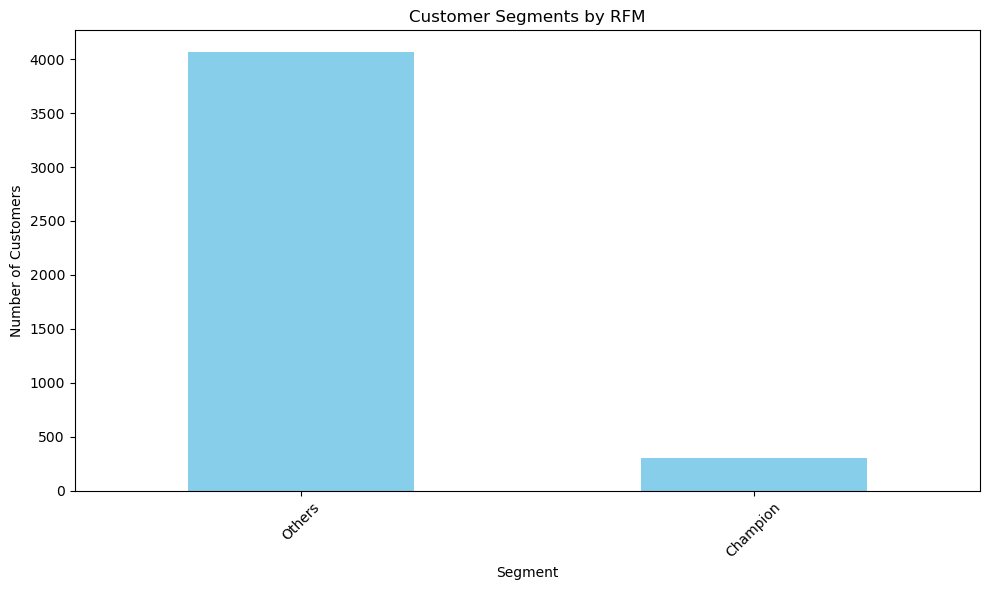

In [46]:
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(10,6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segments by RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

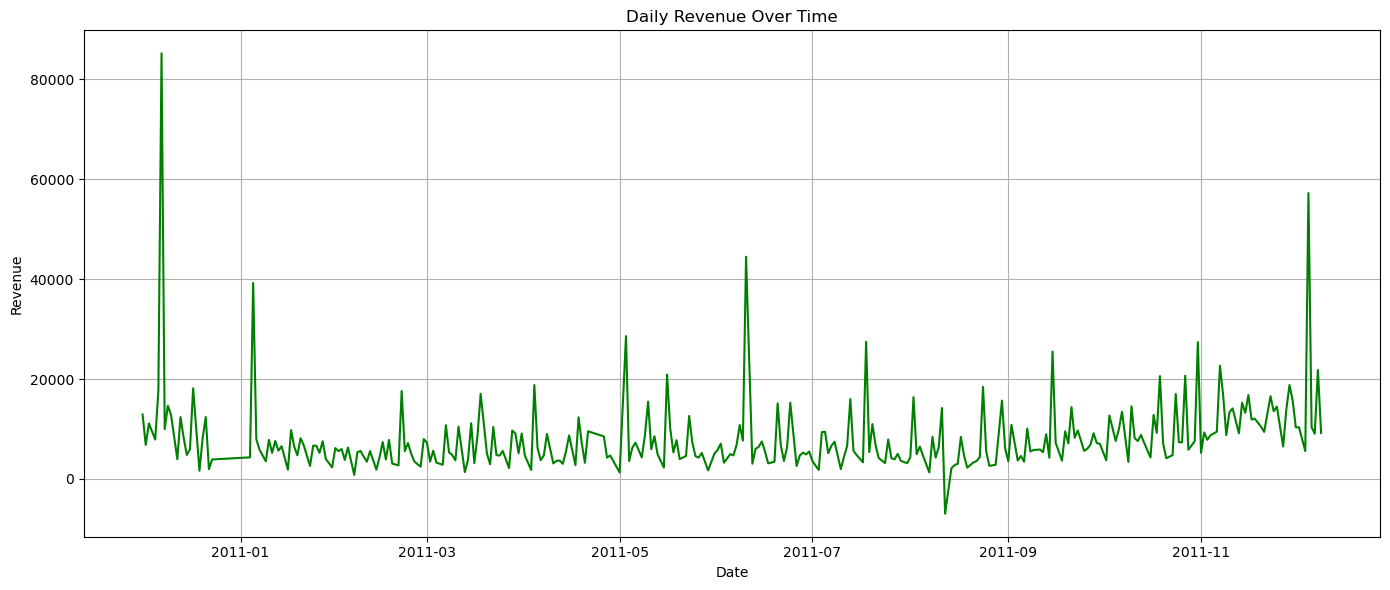

In [48]:
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['UnitPrice'].sum()

plt.figure(figsize=(14,6))
plt.plot(daily_sales.index, daily_sales.values, color='green')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.grid(True)
plt.show()

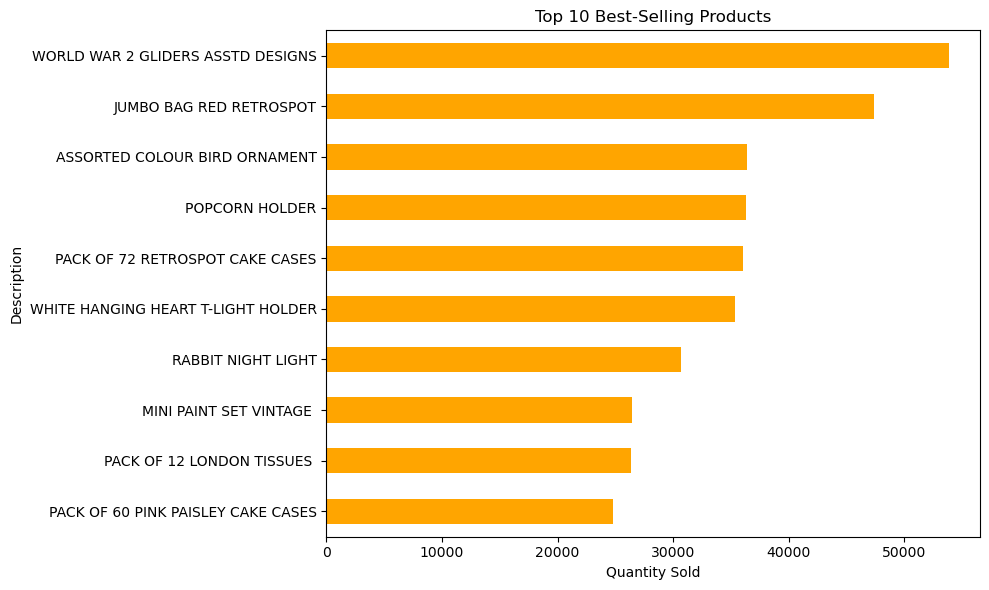

In [50]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='orange')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

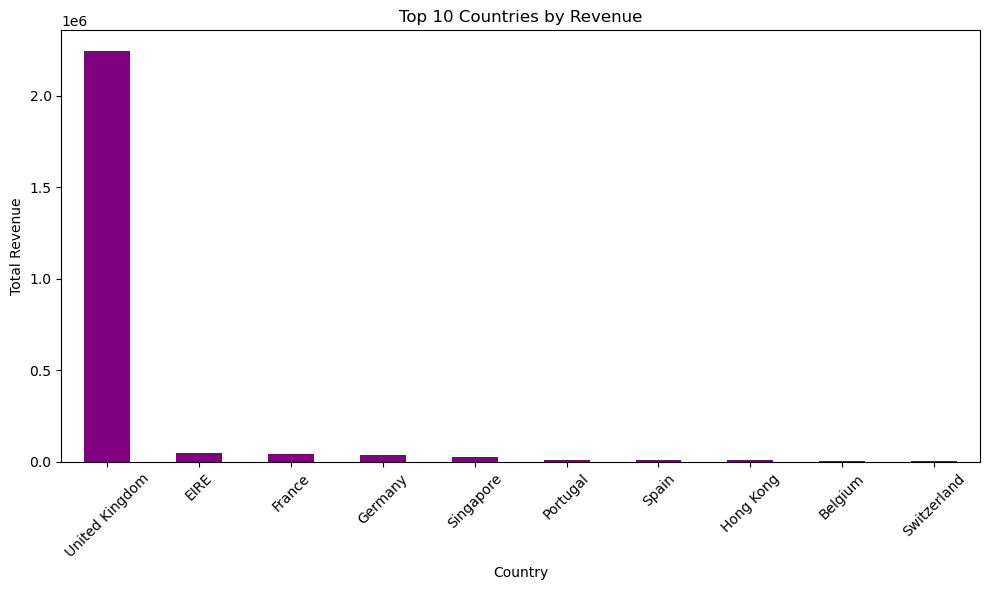

In [52]:
country_revenue = data.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
country_revenue.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

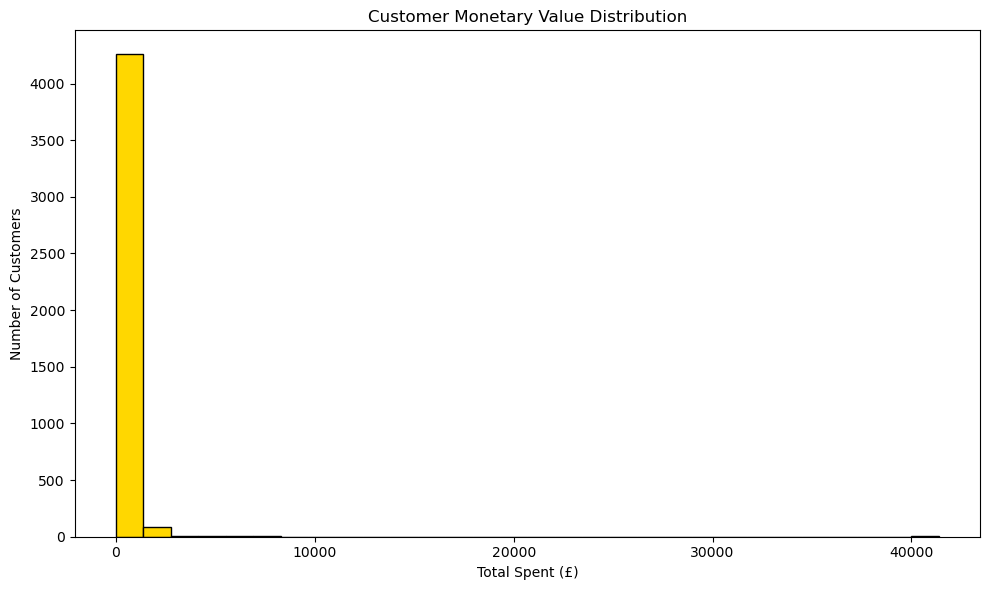

In [53]:
plt.figure(figsize=(10,6))
plt.hist(rfm['Monetary'], bins=30, color='gold', edgecolor='black')
plt.title('Customer Monetary Value Distribution')
plt.xlabel('Total Spent (£)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

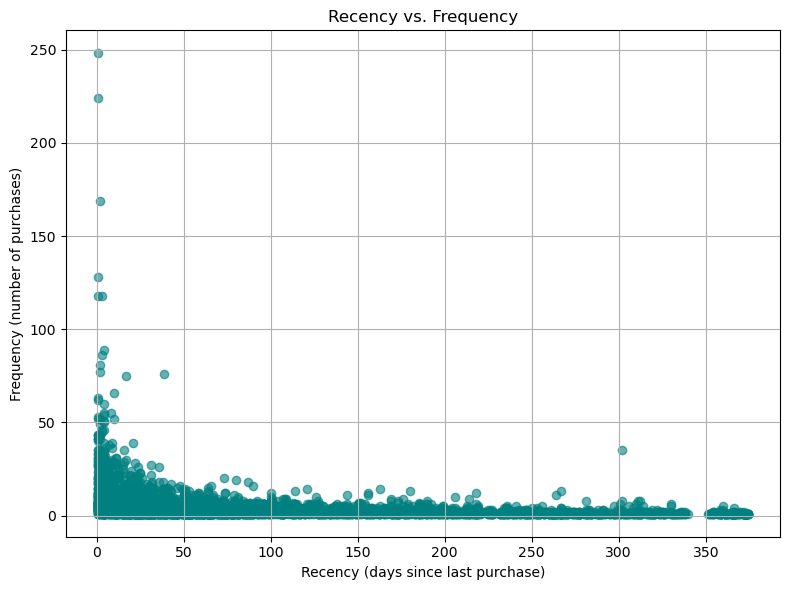

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(rfm['Recency'], rfm['Frequency'], alpha=0.6, color='teal')
plt.title('Recency vs. Frequency')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.grid(True)
plt.tight_layout()
plt.show()

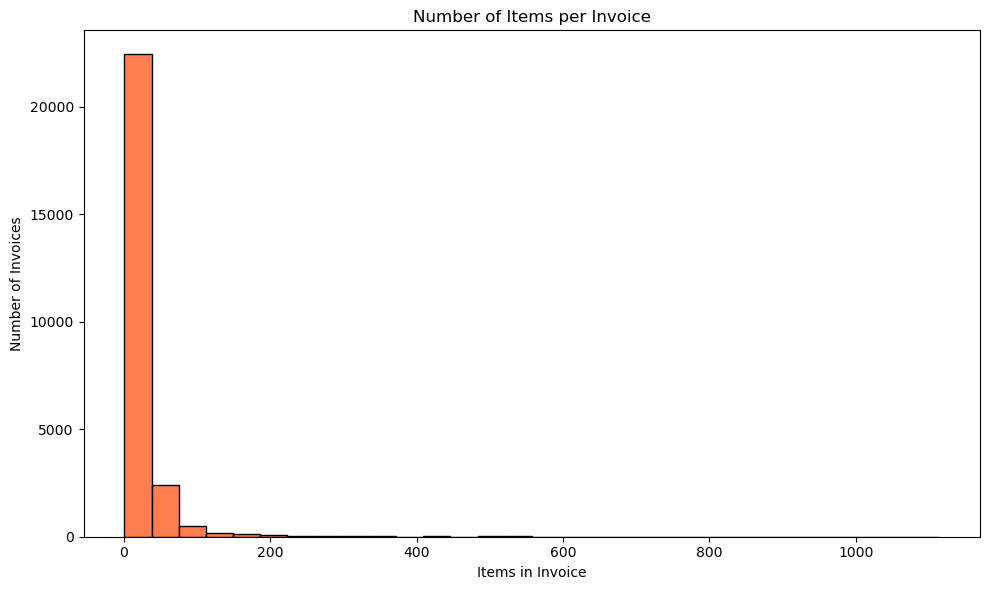

In [56]:
invoice_counts = data['InvoiceNo'].value_counts()

plt.figure(figsize=(10,6))
plt.hist(invoice_counts, bins=30, color='coral', edgecolor='black')
plt.title('Number of Items per Invoice')
plt.xlabel('Items in Invoice')
plt.ylabel('Number of Invoices')
plt.tight_layout()
plt.show()

## 📌 Key Insights

- Most revenue comes from a small set of loyal, high-spending customers.
- Monthly sales peak during holidays (e.g., November, December).
- RFM analysis revealed valuable customer segments (VIPs, loyal, high-risk).

**Next Steps:**
- Launch targeted campaigns for VIPs.
- Win back customers with low frequency/recency.
- Promote best-selling products more aggressively.

## Summary
Top customers (Champions) buy frequently, spend most, and purchased recently; focus marketing on them.

Sales peak in November–December; align promotions with this season.

A small number of products drive most sales; prioritize these in inventory and marketing.

The UK is the largest market; explore growth in other countries.

Most customers purchase only once or twice; a small group drives majority revenue.

Many customers haven’t purchased recently; implement reactivation campaigns.



## Thankyou